<a href="https://colab.research.google.com/github/DhanrajTiwari/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [32]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Importing the dataset
df = pd.read_csv('/content/drive/My Drive/Datasets/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
df.shape

(7787, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In here we can see that all of our having the object type except release_year which is of int type.

In [11]:
# Checking the unique val for each col
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

By Checking with unique values we saw that there are lots of error which we can send our data for further cleaning.

**DATA CLEANING**

In here our task is to remove the **Duplicates values, Null And Missing values**.

In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are 5 columns having null values which we have to clean.

In [13]:
# drop null values of "date_added" column
df=df.dropna(subset=['date_added'])

#Replacing null values with "NULL" in rest four columns
df.fillna("NULL",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [14]:
check_duplicate = df.duplicated(keep = False).any()
if check_duplicate == False:
    print('There are no duplicate rows in our dataset')
else:
    print ('There is an duplicates rows in our dataset')

There are no duplicate rows in our dataset


**Exploratory Data Analysis**

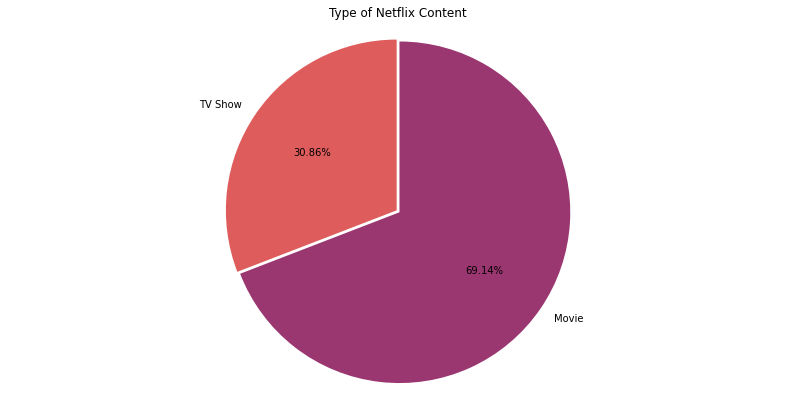

In [15]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%',colors=sns.color_palette("flare",2), startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

In here we are checking the contents of our TV Shows and Movie by using pie chart. And our tv shows having 31% contents and movie is of 69% content.

In [16]:
def countplot_v(x,order,x_label,title):
  # Let's check the total count of each class
  plt.figure(figsize=(10,6))
  plt.grid(b=False,axis='both')

  # Plotting the values in dependent variable
  ax=sns.countplot(x=x, data=df,order = order.value_counts().index[:10],
              palette="flare_r")

  #Anotate the bars with their values
  for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12,color='#607B8B', 
                     xytext=(0, 8),
                     textcoords='offset points')

  # Removing all ticks and label
  plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

  # remove the frame of the chart
  for spine in plt.gca().spines.values():
      spine.set_visible(False)

  ax.set(xlabel=x_label, ylabel = "")
  plt.title(title)


  plt.show()

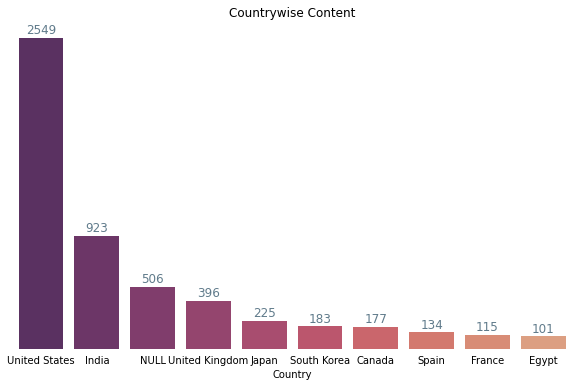

In [17]:
countplot_v("country",df['country'],"Country",'Countrywise Content')


**By ploting bar chart we can see that which country produce more content. And USA is on top of producing the most content.**

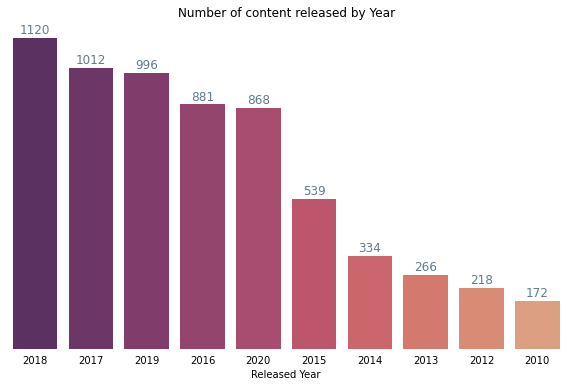

In [18]:
countplot_v("release_year",df['release_year'],"Released Year",'Number of content released by Year')

Yearly produced content.

In [21]:
# Create a list of years when content was added
years = list(range(2008,2020,1))
# Seperate Rows having only movies as content
movie_rows=df.loc[df["type"] == "Movie"]
# Seperate Rows having only TV Shows as content
tv_rows=df.loc[df["type"]=="TV Show"]

movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

Text(0.5, 1.0, 'Movies/TV Shows Added per Year')

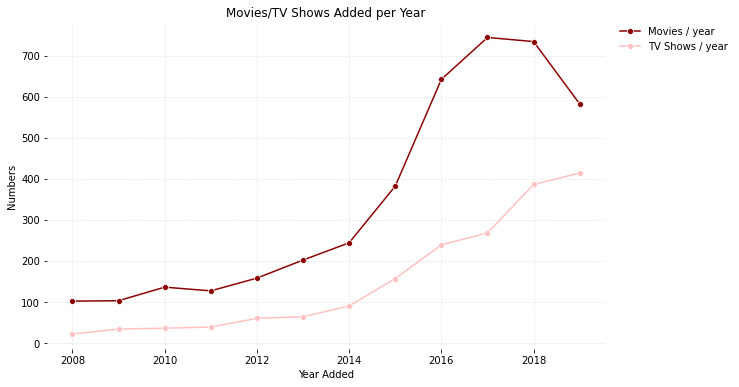

In [22]:
# Create a line plot
plt.figure(figsize=(10,6))

sns.lineplot(data=movies, color="#8B0000",  label="Movies / year",marker='o')
sns.lineplot(data=tv_shows, color="#FFC1C1",  label="TV Shows / year",marker='o')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)


plt.xlabel("Year Added")
plt.ylabel("Numbers")
plt.title('Movies/TV Shows Added per Year')

As we can see in this plot that TV shows and Movies content increased after 2016.

**Checking the Ratings given by the users**.

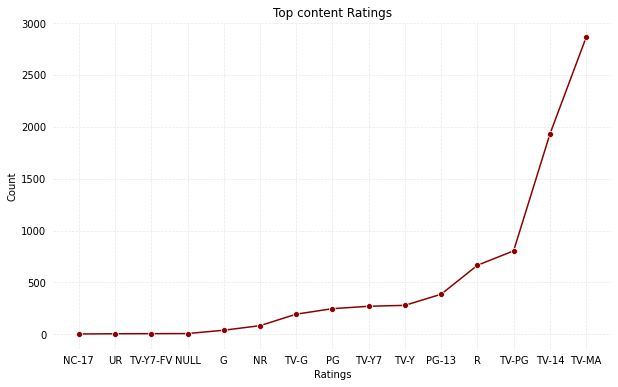

In [23]:
movie_ratings = df.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=True)

plt.figure(figsize=(10,6))

ax=sns.lineplot( x='rating',y='count',data=movie_ratings,color="#8B0000",marker='o')

# Annotate every single Bar with its value, based on it's width           
for p in ax.patches:
    width = p.get_width()
    plt.text(65+p.get_x()+p.get_width(),p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, 
                labelleft=True, labelbottom=True)


# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

ax.set(xlabel="Ratings", ylabel = "Count")
plt.title('Top content Ratings')


plt.show()


**Text Processing**

The text processing is used to remove the punctuations and stopwords etc.

REMOVING THE PUNCTUATIONS.

In [24]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
def remove_punctuation(text):
    '''a function for removing punctuation'''

    import string
    
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# Applying the function to remove punctuations
df['description'] = df['description'].apply(remove_punctuation)

# Applying the function to remove punctuations
df['listed_in'] = df['listed_in'].apply(remove_punctuation)

REMOVING STOPWORDS

In [26]:
#importing natural language tool kit
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
sw = stopwords.words('english')

# Function to remove stopwords 
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# Applying the stopword function
df['description'] = df['description'].apply(stopwords)

# Applying the stopword function
df['listed_in'] = df['listed_in'].apply(stopwords)

STEMMING OF WORDS

In [28]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)  
#stemming for description
df['description'] = df['description'].apply(stemming)

Now we have to rescale our data to sent further for the prediction by using unsupervised learning technique.

In [30]:
# Create a function to display text length
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
# Create two variables for description and listed-in texts length respectively
df['desc_length'] = df['description'].apply(length)
df['listed_length'] = df['listed_in'].apply(length)
# Create a dataframe with variables indicating text lengths only
cluster_df=df.filter(['desc_length','listed_length'],axis=1)
cluster_df.head(2)

,desc_length,listed_length
0,82,49
1,88,27


In [31]:
X_features_rec_mon=df[['desc_length','listed_length']]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon


**Implementing K-MEANS Algorithm**

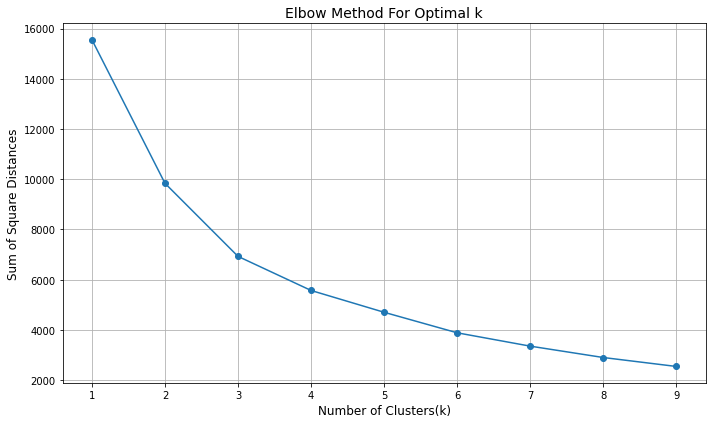

In [33]:
list_1 = []

# for loop to append kmeans inertia values
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    list_1.append(kmeans.inertia_)

#Plot linegraph
plt.figure(figsize=(10,6))

plt.plot(range(1,10),list_1,"-o")
plt.grid(True)
plt.xlabel("Number of Clusters(k)",fontsize=12)
plt.ylabel("Sum of Square Distances",fontsize=12)
plt.title("Elbow Method For Optimal k",fontsize=14)
plt.xticks(range(1,10))
plt.tight_layout()

**In here we are finding the optimum number of clusters by using ELBOW METHOD**

The elbow method runs k-means clustering on the dataset for a range of k values ex(1 to 10).

And in this we have to performing k-means clustering with all the k values.


**Silhouette Score**

Now we have to use silhouette score which gives the accuracy of our model.

In [35]:
# Calculate silhoutte score for K-means
range_n_clusters = [2,3,4,5,6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print(" n_clusters = {}, silhouette score is {}".format(n_clusters, score))

 n_clusters = 2, silhouette score is 0.35498798787159846
 n_clusters = 3, silhouette score is 0.35586172779109915
 n_clusters = 4, silhouette score is 0.3287548428499688
 n_clusters = 5, silhouette score is 0.33540914319121484
 n_clusters = 6, silhouette score is 0.3559851816328128
 n_clusters = 7, silhouette score is 0.35902007761461213
 n_clusters = 8, silhouette score is 0.35223618769373016


As we can see here that by using silhoutte score the more accuracy our n_cluster = 7 is giving.

# **Conclusion**

In this notebook we having Netflix datset which we have to predict by using Unsupervised Learning. In this dataset first i had done the Cleaning & EDA which is very important for the further process and then i had done Text processing and rescled data for prediction, and at last i used k-means clustering algorithm and checked for accuracy by using silhouette score.